In [1]:
import cv2
import warnings
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [82]:
generate_images = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, 
                               shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
def display_image(path):
    plt.figure(figsize=(3,3))
    read = cv2.imread(path)
    read_cvt = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
    plt.imshow(read_cvt)
    plt.show()

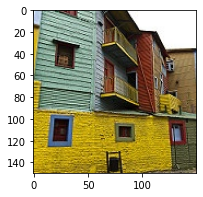

In [69]:
display_image("/content/drive/MyDrive/Colab Notebooks/Data/seg_train/seg_train/buildings/4.jpg")

In [21]:
MyModel = Sequential()

#input layer
MyModel.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(150,150,3))) #impt is 150x150 image with colors
MyModel.add(BatchNormalization())
MyModel.add(MaxPooling2D(pool_size=(2,2)))

#hidden layers
MyModel.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu')) 
MyModel.add(BatchNormalization())
MyModel.add(MaxPooling2D(pool_size=(2,2)))

MyModel.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
MyModel.add(BatchNormalization())
MyModel.add(MaxPooling2D(pool_size=(2,2)))

MyModel.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
MyModel.add(BatchNormalization())
MyModel.add(MaxPooling2D(pool_size=(2,2)))

MyModel.add(Flatten())

#dense layers
MyModel.add(Dense(1024, activation='relu'))
MyModel.add(BatchNormalization())
MyModel.add(Dropout(0.5))

MyModel.add(Dense(512, activation='relu'))
MyModel.add(BatchNormalization())
MyModel.add(Dropout(0.5))

MyModel.add(Dense(6, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
MyModel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [22]:
MyModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_12 (Bat  (None, 148, 148, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_13 (Bat  (None, 72, 72, 32)       128       
 chNormalization)                                                
                                                      

In [36]:
train_data = generate_imagesimage_gen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Data/seg_train/seg_train", target_size=(150,150),batch_size=25)

Found 14212 images belonging to 6 classes.


In [37]:
val_data = generate_images.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Data/seg_test/seg_test", target_size=(150,150),batch_size=25)

Found 3000 images belonging to 6 classes.


In [23]:
history = MyModel.fit_generator(generator=train_data,
                              epochs=30,
                              validation_data=val_data)


Epoch 1/30
569/569 [==============================] - 7551s 13s/step - loss: 1.2392 - accuracy: 0.5830 - val_loss: 1.2732 - val_accuracy: 0.5433
Epoch 2/30
569/569 [==============================] - 722s 1s/step - loss: 0.8477 - accuracy: 0.6915 - val_loss: 0.9179 - val_accuracy: 0.6590
Epoch 3/30
569/569 [==============================] - 731s 1s/step - loss: 0.7247 - accuracy: 0.7392 - val_loss: 0.6986 - val_accuracy: 0.7473
Epoch 4/30
569/569 [==============================] - 735s 1s/step - loss: 0.6584 - accuracy: 0.7638 - val_loss: 0.6511 - val_accuracy: 0.7480
Epoch 5/30
569/569 [==============================] - 723s 1s/step - loss: 0.6155 - accuracy: 0.7784 - val_loss: 0.6569 - val_accuracy: 0.7653
Epoch 6/30
569/569 [==============================] - 716s 1s/step - loss: 0.5741 - accuracy: 0.7936 - val_loss: 0.6186 - val_accuracy: 0.7743
Epoch 7/30
569/569 [==============================] - 718s 1s/step - loss: 0.5693 - accuracy: 0.7978 - val_loss: 0.9304 - val_accuracy: 0.67

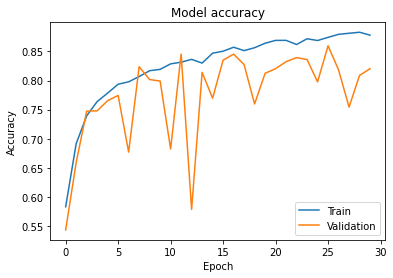

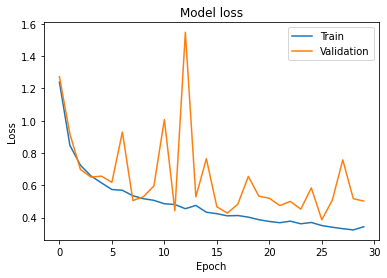

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [27]:
MyModel.save("Final_Model.h5")

In [75]:
def Predict(path):
    img = tf.keras.utils.load_img(path, target_size=(150,150))
    image = np.expand_dims(img, axis=0)
    image = image/255
    predict = MyModel.predict(image)
    final_prediction = np.argmax(predict , axis=1)
    # print(final_prediction)
    display_image(path)

    for i in train_data.class_indices:
        if final_prediction == train_data.class_indices[i]:
            print("prediction:", i)

1/1 [==============================] - 0s 34ms/step


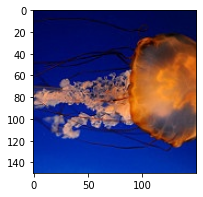

prediction: sea


In [77]:
Predict("/content/drive/MyDrive/Colab Notebooks/Data/seg_pred/seg_pred/63.jpg")

1/1 [==============================] - 0s 39ms/step


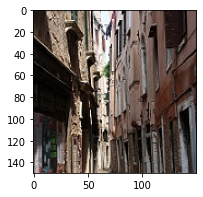

prediction: buildings


In [79]:
Predict("/content/drive/MyDrive/Colab Notebooks/Data/seg_pred/seg_pred/133.jpg")

1/1 [==============================] - 0s 34ms/step


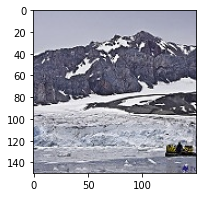

prediction: glacier


In [80]:
Predict("/content/drive/MyDrive/Colab Notebooks/Data/seg_pred/seg_pred/561.jpg")

1/1 [==============================] - 0s 41ms/step


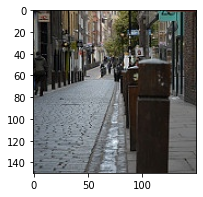

prediction: street


In [81]:
Predict("/content/drive/MyDrive/Colab Notebooks/Data/seg_pred/seg_pred/653.jpg")